In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
plt.style.use("seaborn-whitegrid")

In [2]:
start_date = np.datetime64("now") - np.timedelta64(365,'D')
end_date = np.datetime64("now")

In [3]:
from pandas_datareader import data as web

Extracting the stock data from yahoo api
~~~
nifty=web.DataReader(name="^NSEI",data_source="yahoo",
                     start=start_date,end=end_date)
nifty.tail()
~~~

Save the dataframe to a csv file
~~~
nifty.to_csv("nifty.csv")
~~~

In [7]:
nifty=pd.read_csv("nifty.csv")
nifty.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-04-12,11657.349609,11578.799805,11612.849609,11643.450195,246000.0,11643.450195
1,2019-04-15,11704.599609,11648.250000,11667.000000,11690.349609,290000.0,11690.349609
2,2019-04-16,11810.950195,11731.549805,11736.200195,11787.150391,354300.0,11787.150391
3,2019-04-18,11856.150391,11738.500000,11856.150391,11752.799805,339700.0,11752.799805
4,2019-04-22,11727.049805,11583.950195,11727.049805,11594.450195,260400.0,11594.450195


In [9]:
nifty.index=pd.to_datetime(nifty.Date)
nifty.drop("Date",axis=1,inplace=True)
nifty.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-12,11657.349609,11578.799805,11612.849609,11643.450195,246000.0,11643.450195
2019-04-15,11704.599609,11648.250000,11667.000000,11690.349609,290000.0,11690.349609
2019-04-16,11810.950195,11731.549805,11736.200195,11787.150391,354300.0,11787.150391
2019-04-18,11856.150391,11738.500000,11856.150391,11752.799805,339700.0,11752.799805
2019-04-22,11727.049805,11583.950195,11727.049805,11594.450195,260400.0,11594.450195


In [10]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2019-04-12 to 2020-04-09
Data columns (total 6 columns):
High         241 non-null float64
Low          241 non-null float64
Open         241 non-null float64
Close        241 non-null float64
Volume       241 non-null float64
Adj Close    241 non-null float64
dtypes: float64(6)
memory usage: 13.2 KB


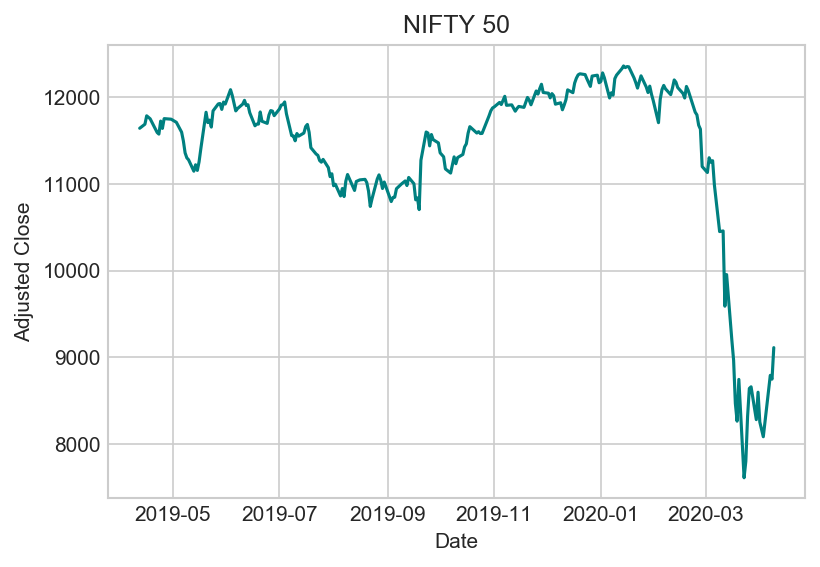

In [11]:
plt.figure(dpi=150)
plt.plot(nifty["Adj Close"],c="teal")
plt.title("NIFTY 50")
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.show()

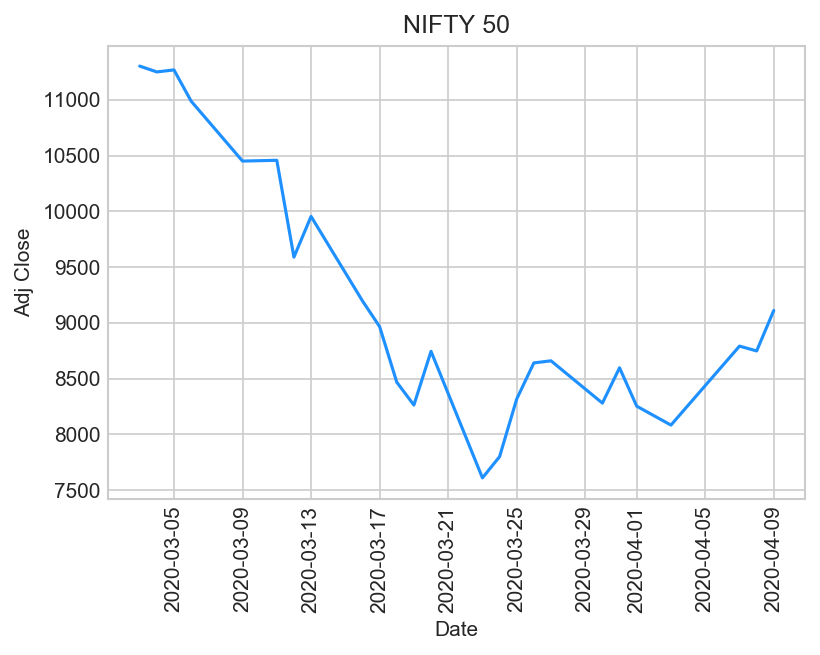

In [12]:
plt.figure(dpi=150)
sns.lineplot(nifty.index[-25:],nifty["Adj Close"][-25:],color="dodgerblue")
plt.xticks(rotation="90")
plt.title("NIFTY 50")
plt.show()

# Rolling Mean

In [13]:
nifty["RollingMean_7_Adj_Close"]=nifty["Adj Close"].rolling(window=7,min_periods=0).mean()
nifty["RollingMean_30_Adj_Close"]=nifty["Adj Close"].rolling(window=30,min_periods=0).mean()
nifty.tail()

,High,Low,Open,Close,Volume,Adj Close,RollingMean_7_Adj_Close,RollingMean_30_Adj_Close
Date,,,,,,,,
2020-04-01,8588.099609,8198.349609,8584.099609,8253.799805,506300.0,8253.799805,8364.749860,10018.215039
2020-04-03,8356.549805,8055.799805,8356.549805,8083.799805,697000.0,8083.799805,8405.142718,9887.925033
2020-04-07,8819.400391,8360.950195,8446.299805,8792.200195,814200.0,8792.200195,8472.907087,9776.801693
2020-04-08,9131.700195,8653.900391,8688.900391,8748.750000,896500.0,8748.750000,8488.235631,9665.731706
2020-04-09,9128.349609,8904.549805,8973.049805,9111.900391,742100.0,9111.900391,8552.757115,9575.148372


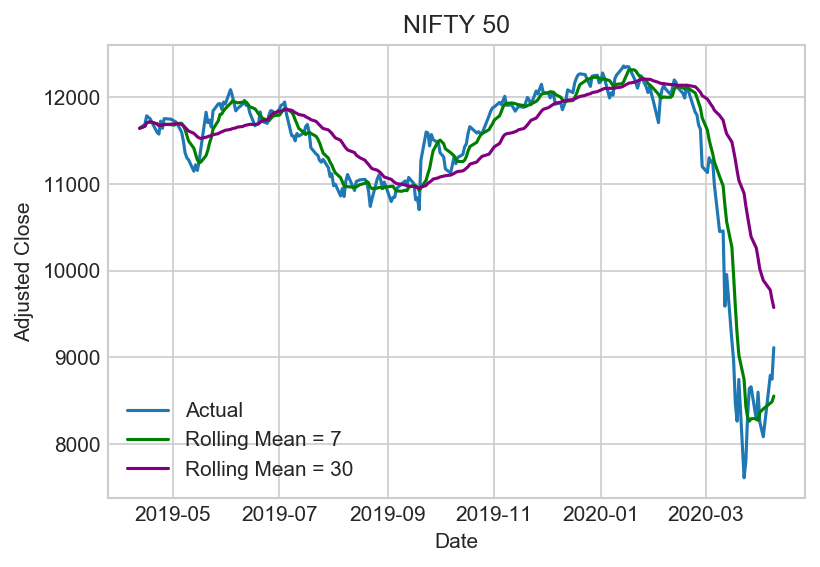

In [14]:
plt.figure(dpi=150)
plt.plot(nifty["Adj Close"],label="Actual")
plt.plot(nifty.RollingMean_7_Adj_Close,label="Rolling Mean = 7",c="g")
plt.plot(nifty.RollingMean_30_Adj_Close,label="Rolling Mean = 30",c="purple")
plt.title("NIFTY 50")
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.legend()
plt.show()

# Individual NIFTY Stocks

In [15]:
stock=pd.read_csv("nifty50_list.csv")
stock.head()

,Company Name,Symbol,Sector
0,Adani Ports,ADANIPORTS.NS,Infrastructure
1,Asian Paints Ltd,ASIANPAINT.NS,Consumer Goods
2,Axis Bank,AXISBANK.NS,Banking
3,Bajaj Auto,BAJAJ-AUTO.NS,Automobile
4,Bajaj Finance,BAJFINANCE.NS,Financial Services


In [17]:
stock["Symbol"][0]

'ADANIPORTS.NS'

In [19]:
web.DataReader(name=stock["Symbol"][0],data_source="yahoo", start=start_date,end=end_date).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-12,387.000000,377.299988,379.200012,385.649994,2146541.0,381.233948
2019-04-15,389.000000,382.750000,385.000000,387.049988,2070828.0,382.617920
2019-04-16,396.549988,386.100006,387.049988,395.649994,3728013.0,391.119446
2019-04-18,395.500000,388.899994,395.000000,390.549988,3218018.0,386.077850
2019-04-22,391.799988,384.250000,388.399994,391.049988,2279282.0,386.572113


In [24]:
for i in stock["Symbol"][0:10]:
    print(i.split(".")[0])

ADANIPORTS
ASIANPAINT
AXISBANK
BAJAJ-AUTO
BAJFINANCE
BAJAJFINSV
BHARTIARTL
INFRATEL
BPCL
CIPLA


In [36]:
from time import sleep
% timeit for i in range(10): sleep(1)

10.1 s ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Downloading all the Stocks data

# Export Stocks data to csv file

~~~
for i in tqdm(stock["Symbol"]):
    data=web.DataReader(name=i,data_source="yahoo", start=start_date,end=end_date)
    data.to_csv(i.split(".")[0]+".csv")
    sleep(1)
~~~

In [43]:
print(stock["Sector"].unique())
print("\nNo of Unique Sectors",len(stock["Sector"].unique()))

['Infrastructure' 'Consumer Goods' 'Banking' 'Automobile'
 'Financial Services' 'Telecommunication' 'Energy - Oil & Gas'
 'Pharmaceuticals' 'Energy & Mining' 'Cement' 'Information Technology'
 'Metals' 'Construction' 'Food Processing' 'Energy - Power' 'Chemicals'
 'Media & Entertainment']

No of Unique Sectors 17


In [52]:
stock.loc[stock["Sector"]=="Infrastructure","Symbol"].values

array(['ADANIPORTS.NS'], dtype=object)

In [55]:
for i in stock["Sector"].unique():
    print("Sector -",i,"\n\tCompany - ",stock.loc[stock["Sector"]==i,"Symbol"].values)

Sector - Infrastructure 
	Company -  ['ADANIPORTS.NS']
Sector - Consumer Goods 
	Company -  ['ASIANPAINT.NS' 'HINDUNILVR.NS' 'BRITANNIA.NS' 'ITC.NS' 'TITAN.NS']
Sector - Banking 
	Company -  ['AXISBANK.NS' 'HDFCBANK.NS' 'ICICIBANK.NS' 'INDUSINDBK.NS' 'KOTAKBANK.NS'
 'SBIN.NS']
Sector - Automobile 
	Company -  ['BAJAJ-AUTO.NS' 'EICHERMOT.NS' 'HEROMOTOCO.NS' 'M&M.NS' 'MARUTI.NS'
 'TATAMOTORS.NS']
Sector - Financial Services 
	Company -  ['BAJFINANCE.NS' 'BAJAJFINSV.NS' 'HDFC.NS']
Sector - Telecommunication 
	Company -  ['BHARTIARTL.NS' 'INFRATEL.NS']
Sector - Energy - Oil & Gas 
	Company -  ['BPCL.NS' 'GAIL.NS' 'IOC.NS' 'ONGC.NS' 'RELIANCE.NS']
Sector - Pharmaceuticals 
	Company -  ['CIPLA.NS' 'DRREDDY.NS' 'SUNPHARMA.NS']
Sector - Energy & Mining 
	Company -  ['COALINDIA.NS']
Sector - Cement 
	Company -  ['GRASIM.NS' 'ULTRACEMCO.NS' 'SHREECEM.NS']
Sector - Information Technology 
	Company -  ['HCLTECH.NS' 'INFY.NS' 'TCS.NS' 'TECHM.NS' 'WIPRO.NS']
Sector - Metals 
	Company -  ['HINDALCO.N

In [56]:
stock.loc[stock["Sector"]=="Consumer Goods","Symbol"].values

array(['ASIANPAINT.NS', 'HINDUNILVR.NS', 'BRITANNIA.NS', 'ITC.NS',
       'TITAN.NS'], dtype=object)

In [58]:
for i in stock.loc[stock["Sector"]=="Consumer Goods","Symbol"].values:
    print(i.split(".")[0]+".csv")

ASIANPAINT.csv
HINDUNILVR.csv
BRITANNIA.csv
ITC.csv
TITAN.csv


# Rolling Mean for Consumer Goods Sector

In [74]:
data=pd.DataFrame()
for i in stock.loc[stock["Sector"]=="Consumer Goods","Symbol"].values:
    name=i.split(".")[0]
    df=pd.read_csv(name+".csv")
    data[name]=df["Adj Close"].rolling(window=30,min_periods=0).mean()
print(data.head())

    ASIANPAINT   HINDUNILVR    BRITANNIA         ITC        TITAN
0  1422.571655  1700.457886  2967.115967  300.002838  1086.981567
1  1419.061340  1700.655396  2974.150146  299.880173  1083.587891
2  1426.938965  1706.153564  2983.802572  300.395304  1092.332316
3  1433.498138  1709.235992  2982.974060  299.966026  1098.029816
4  1432.242310  1711.075562  2982.954150  299.198230  1101.111401


# Define the function

In [132]:
def stock_sector(sector,rollingWindow=30):
    data=pd.DataFrame()
    for i in stock.loc[stock["Sector"]==sector,"Symbol"].values:
        name=i.split(".")[0]
        df=pd.read_csv(name+".csv")
        data[name]=df["Adj Close"].rolling(window=rollingWindow,min_periods=0).mean()
    return data

In [133]:
consumer=stock_sector("Consumer Goods")
consumer.head()

,ASIANPAINT,HINDUNILVR,BRITANNIA,ITC,TITAN
0,1422.571655,1700.457886,2967.115967,300.002838,1086.981567
1,1419.061340,1700.655396,2974.150146,299.880173,1083.587891
2,1426.938965,1706.153564,2983.802572,300.395304,1092.332316
3,1433.498138,1709.235992,2982.974060,299.966026,1098.029816
4,1432.242310,1711.075562,2982.954150,299.198230,1101.111401


# Sector-wise Stock market Rolling mean

In [134]:
nifty_full=pd.DataFrame()
for i in tqdm(stock["Sector"].unique()):
    nifty_full[i]=stock_sector(i).mean(axis=1)
nifty_full.index=pd.to_datetime(nifty.index)
nifty_full.head()

100%|█████████████████████████████| 17/17 [00:00<00:00, 18.90it/s]


,Infrastructure,Consumer Goods,Banking,Automobile,Financial Services,Telecommunication,Energy - Oil & Gas,Pharmaceuticals,Energy & Mining,Cement,Information Technology,Metals,Construction,Food Processing,Energy - Power,Chemicals,Media & Entertainment
Date,,,,,,,,,,,,,,,,,
2019-04-12,381.233948,1495.425983,944.141922,5720.630409,4173.794149,306.064682,424.488419,1264.882762,220.878586,7985.051575,853.616339,296.072891,1324.964966,10836.522461,160.088104,612.380249,413.976837
2019-04-15,381.925934,1495.466989,948.401258,5727.666869,4169.657491,305.915924,423.585591,1263.366053,225.098030,8048.742452,863.880078,299.559586,1323.017822,10834.694824,160.521111,613.686462,413.209579
2019-04-16,384.990438,1501.924544,955.880890,5736.481868,4178.524211,306.737696,423.746141,1266.083727,226.993724,8098.456767,868.020874,300.855445,1330.319784,10895.211589,160.604655,615.036987,412.607320
2019-04-18,385.262291,1504.740807,956.269737,5730.600369,4178.926229,306.260880,426.202769,1265.527641,227.907169,8130.516734,870.837703,300.501762,1328.932373,10875.774414,160.074871,615.737076,409.026749
2019-04-22,385.524255,1505.316331,952.352863,5699.989655,4167.799382,305.479623,424.764199,1264.367159,228.565311,8126.991789,873.427737,298.961243,1327.992871,10849.378711,159.867943,616.587134,405.739880


# Rolling Mean of all Nifty Stock

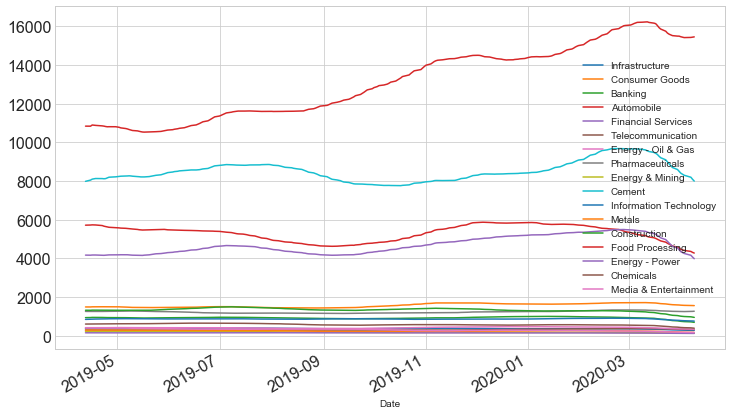

In [96]:
nifty_full.plot(figsize=(12,7),fontsize=16)

# Calculate Percentage of Increase or Decrease based on Day 1

In [111]:
nifty_full["Infrastructure"]/nifty_full["Infrastructure"][0]

Date
2019-04-12    1.000000
2019-04-15    1.001815
2019-04-16    1.009854
2019-04-18    1.010567
2019-04-22    1.011254
2019-04-23    1.011647
2019-04-24    1.012243
2019-04-25    1.011879
2019-04-26    1.012317
2019-04-30    1.012939
2019-05-02    1.014038
2019-05-03    1.013214
2019-05-06    1.011030
2019-05-07    1.007696
2019-05-08    1.004443
2019-05-09    1.000640
2019-05-10    0.998604
2019-05-13    0.995671
2019-05-14    0.993838
2019-05-15    0.990840
2019-05-16    0.989529
2019-05-17    0.987819
2019-05-20    0.989977
2019-05-21    0.990606
2019-05-22    0.991013
2019-05-23    0.993542
2019-05-24    0.996144
2019-05-27    0.998759
2019-05-28    1.001216
2019-05-29    1.002982
                ...   
2020-02-25    0.972775
2020-02-26    0.970111
2020-02-27    0.966903
2020-02-28    0.962687
2020-03-02    0.958627
2020-03-03    0.955795
2020-03-04    0.952854
2020-03-05    0.949875
2020-03-06    0.946031
2020-03-09    0.940596
2020-03-11    0.935316
2020-03-12    0.927939
2020-0

In [129]:
nifty_scaled=nifty_full/nifty_full.iloc[0,:]*100
nifty_scaled.head()

,Infrastructure,Consumer Goods,Banking,Automobile,Financial Services,Telecommunication,Energy - Oil & Gas,Pharmaceuticals,Energy & Mining,Cement,Information Technology,Metals,Construction,Food Processing,Energy - Power,Chemicals,Media & Entertainment
Date,,,,,,,,,,,,,,,,,
2019-04-12,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2019-04-15,100.181512,100.002742,100.451133,100.123001,99.900890,99.951397,99.787314,99.880091,101.910300,100.797626,101.202383,101.177647,99.853042,99.983134,100.270480,100.213301,99.814662
2019-04-16,100.985350,100.434563,101.243348,100.277093,100.113328,100.219893,99.825136,100.094947,102.768552,101.420219,101.687472,101.615330,100.404148,100.541586,100.322667,100.433838,99.669180
2019-04-18,101.056659,100.622888,101.284533,100.174281,100.122960,100.064103,100.403863,100.050983,103.182103,101.821718,102.017459,101.495872,100.299435,100.362219,99.991734,100.548161,98.804260
2019-04-22,101.125374,100.661373,100.869672,99.639187,99.856371,99.808845,100.064968,99.959237,103.480068,101.777574,102.320878,100.975554,100.228527,100.118638,99.862475,100.686973,98.010286


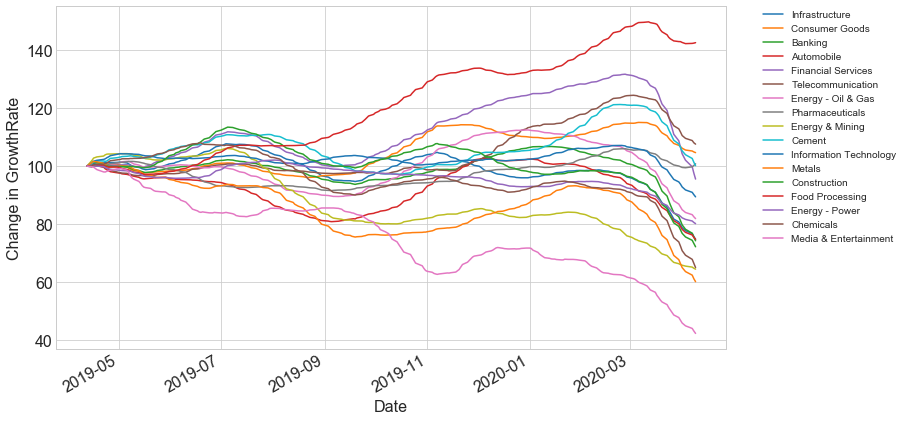

In [130]:
nifty_scaled.plot(figsize=(12,7),fontsize=16)
plt.xlabel("Date",fontsize=16)
plt.ylabel("Change in GrowthRate",fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

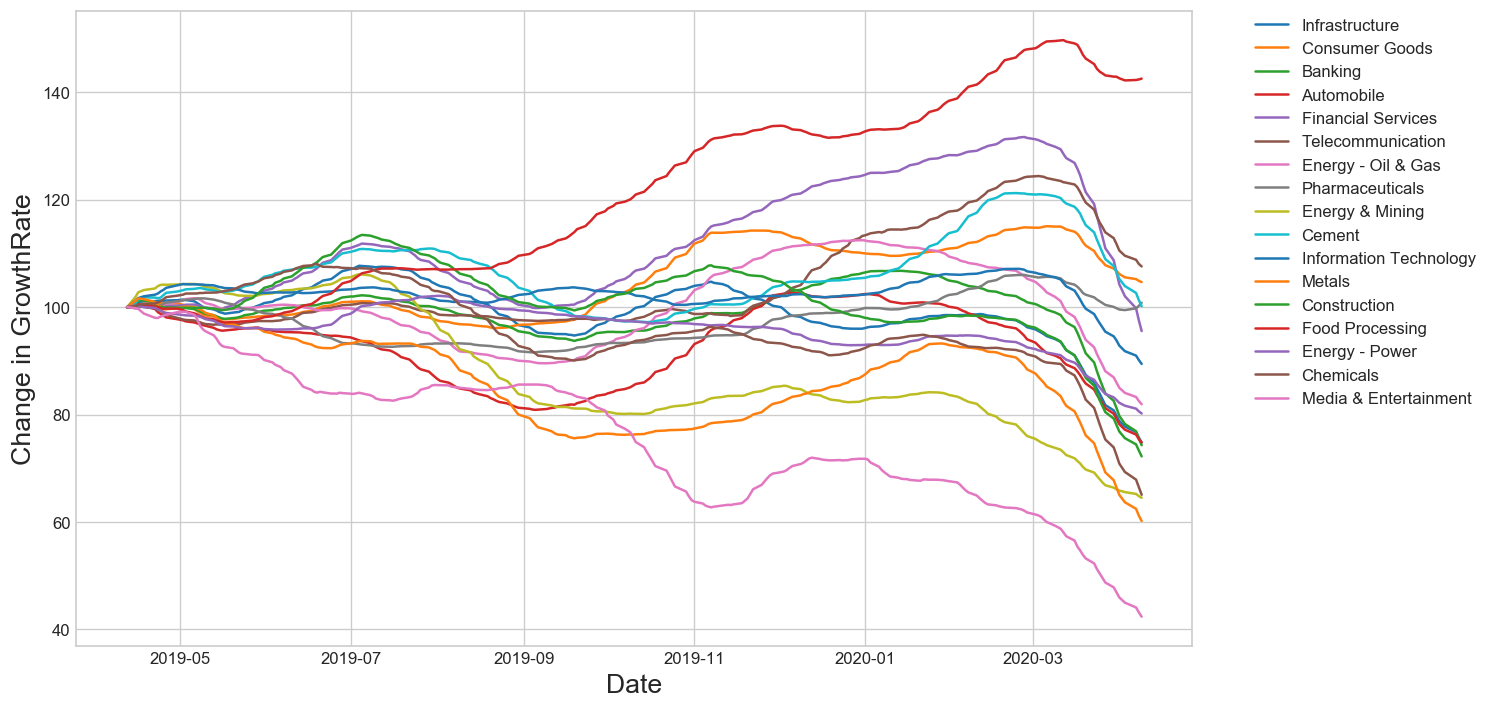

In [131]:
plt.figure(dpi=120,figsize=(12,7))
plt.plot(nifty_scaled)
plt.legend(nifty_scaled.columns,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Date",fontsize=16)
plt.ylabel("Change in GrowthRate",fontsize=16)
plt.show()

# Correlation Analysis

In [97]:
nifty_full.corr()

,Infrastructure,Consumer Goods,Banking,Automobile,Financial Services,Telecommunication,Energy - Oil & Gas,Pharmaceuticals,Energy & Mining,Cement,Information Technology,Metals,Construction,Food Processing,Energy - Power,Chemicals,Media & Entertainment
Infrastructure,1.000000,-0.248027,0.617285,0.362310,-0.100609,-0.469499,0.263385,-0.424621,0.741961,-0.073362,0.474286,0.585856,0.966312,-0.541707,0.842579,0.900404,0.574348
Consumer Goods,-0.248027,1.000000,0.244467,0.475756,0.863709,0.713144,0.676231,0.568597,-0.623436,0.341302,0.134214,-0.263811,-0.302554,0.899788,-0.562423,-0.486072,-0.804575
Banking,0.617285,0.244467,1.000000,0.810806,0.524425,0.193709,0.813072,0.173679,0.374911,0.272155,0.742421,0.674592,0.531922,-0.018037,0.395854,0.550009,0.241649
Automobile,0.362310,0.475756,0.810806,1.000000,0.535787,0.248717,0.940562,0.461741,0.289315,0.158246,0.475673,0.589178,0.238356,0.125458,0.017178,0.340836,0.044655
Financial Services,-0.100609,0.863709,0.524425,0.535787,1.000000,0.856667,0.734332,0.591356,-0.454658,0.651316,0.420548,0.028234,-0.166664,0.812363,-0.411981,-0.269946,-0.661394
Telecommunication,-0.469499,0.713144,0.193709,0.248717,0.856667,1.000000,0.413196,0.780072,-0.578835,0.769077,0.274435,-0.032484,-0.560773,0.823889,-0.649618,-0.501607,-0.691364
Energy - Oil & Gas,0.263385,0.676231,0.813072,0.940562,0.734332,0.413196,1.000000,0.471369,0.013234,0.215573,0.503708,0.375780,0.165018,0.383367,-0.087628,0.143914,-0.196954
Pharmaceuticals,-0.424621,0.568597,0.173679,0.461741,0.591356,0.780072,0.471369,1.000000,-0.270196,0.590398,0.285873,0.264154,-0.589713,0.531510,-0.614848,-0.304441,-0.377639
Energy & Mining,0.741961,-0.623436,0.374911,0.289315,-0.454658,-0.578835,0.013234,-0.270196,1.000000,-0.106755,0.257620,0.792595,0.686046,-0.861989,0.681820,0.928296,0.845906
Cement,-0.073362,0.341302,0.272155,0.158246,0.651316,0.769077,0.215573,0.590398,-0.106755,1.000000,0.418688,0.322127,-0.162565,0.417218,-0.255219,-0.022009,-0.330390


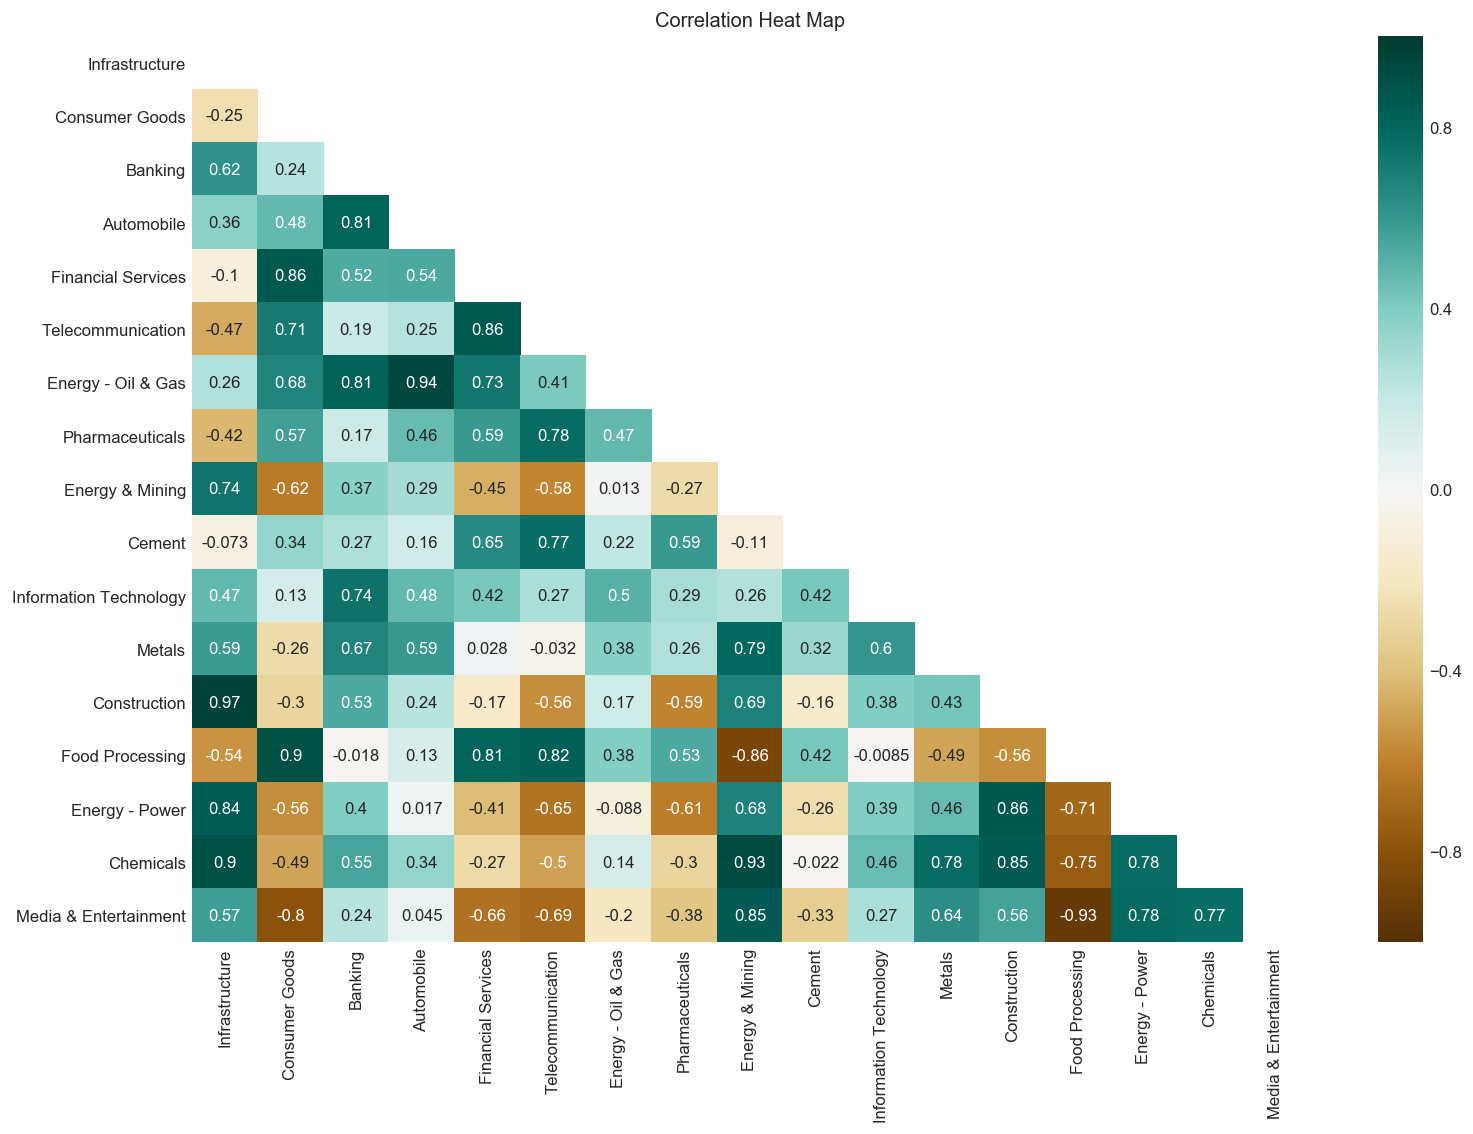

In [101]:
plt.figure(dpi=120,figsize=(15,10))
sns.heatmap(nifty_full.corr(),center=0,cmap="BrBG",vmin=-1,vmax=1,annot = True,
           mask=np.triu(nifty_full.corr()))
plt.title("Correlation Heat Map")
plt.show()

# Sector wise Stocks

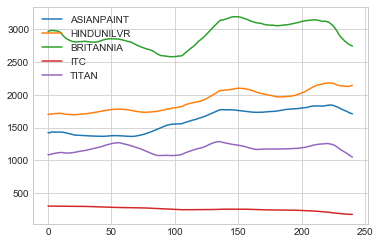

In [135]:
stock_sector("Consumer Goods").plot()

In [142]:
l=len(stock["Sector"].unique())
print("No of Unique Sectors is ",l)

No of Unique Sectors is  17


In [147]:
ncols=3
nrows=int((l+1)/ncols)
print(ncols,nrows)

3 6


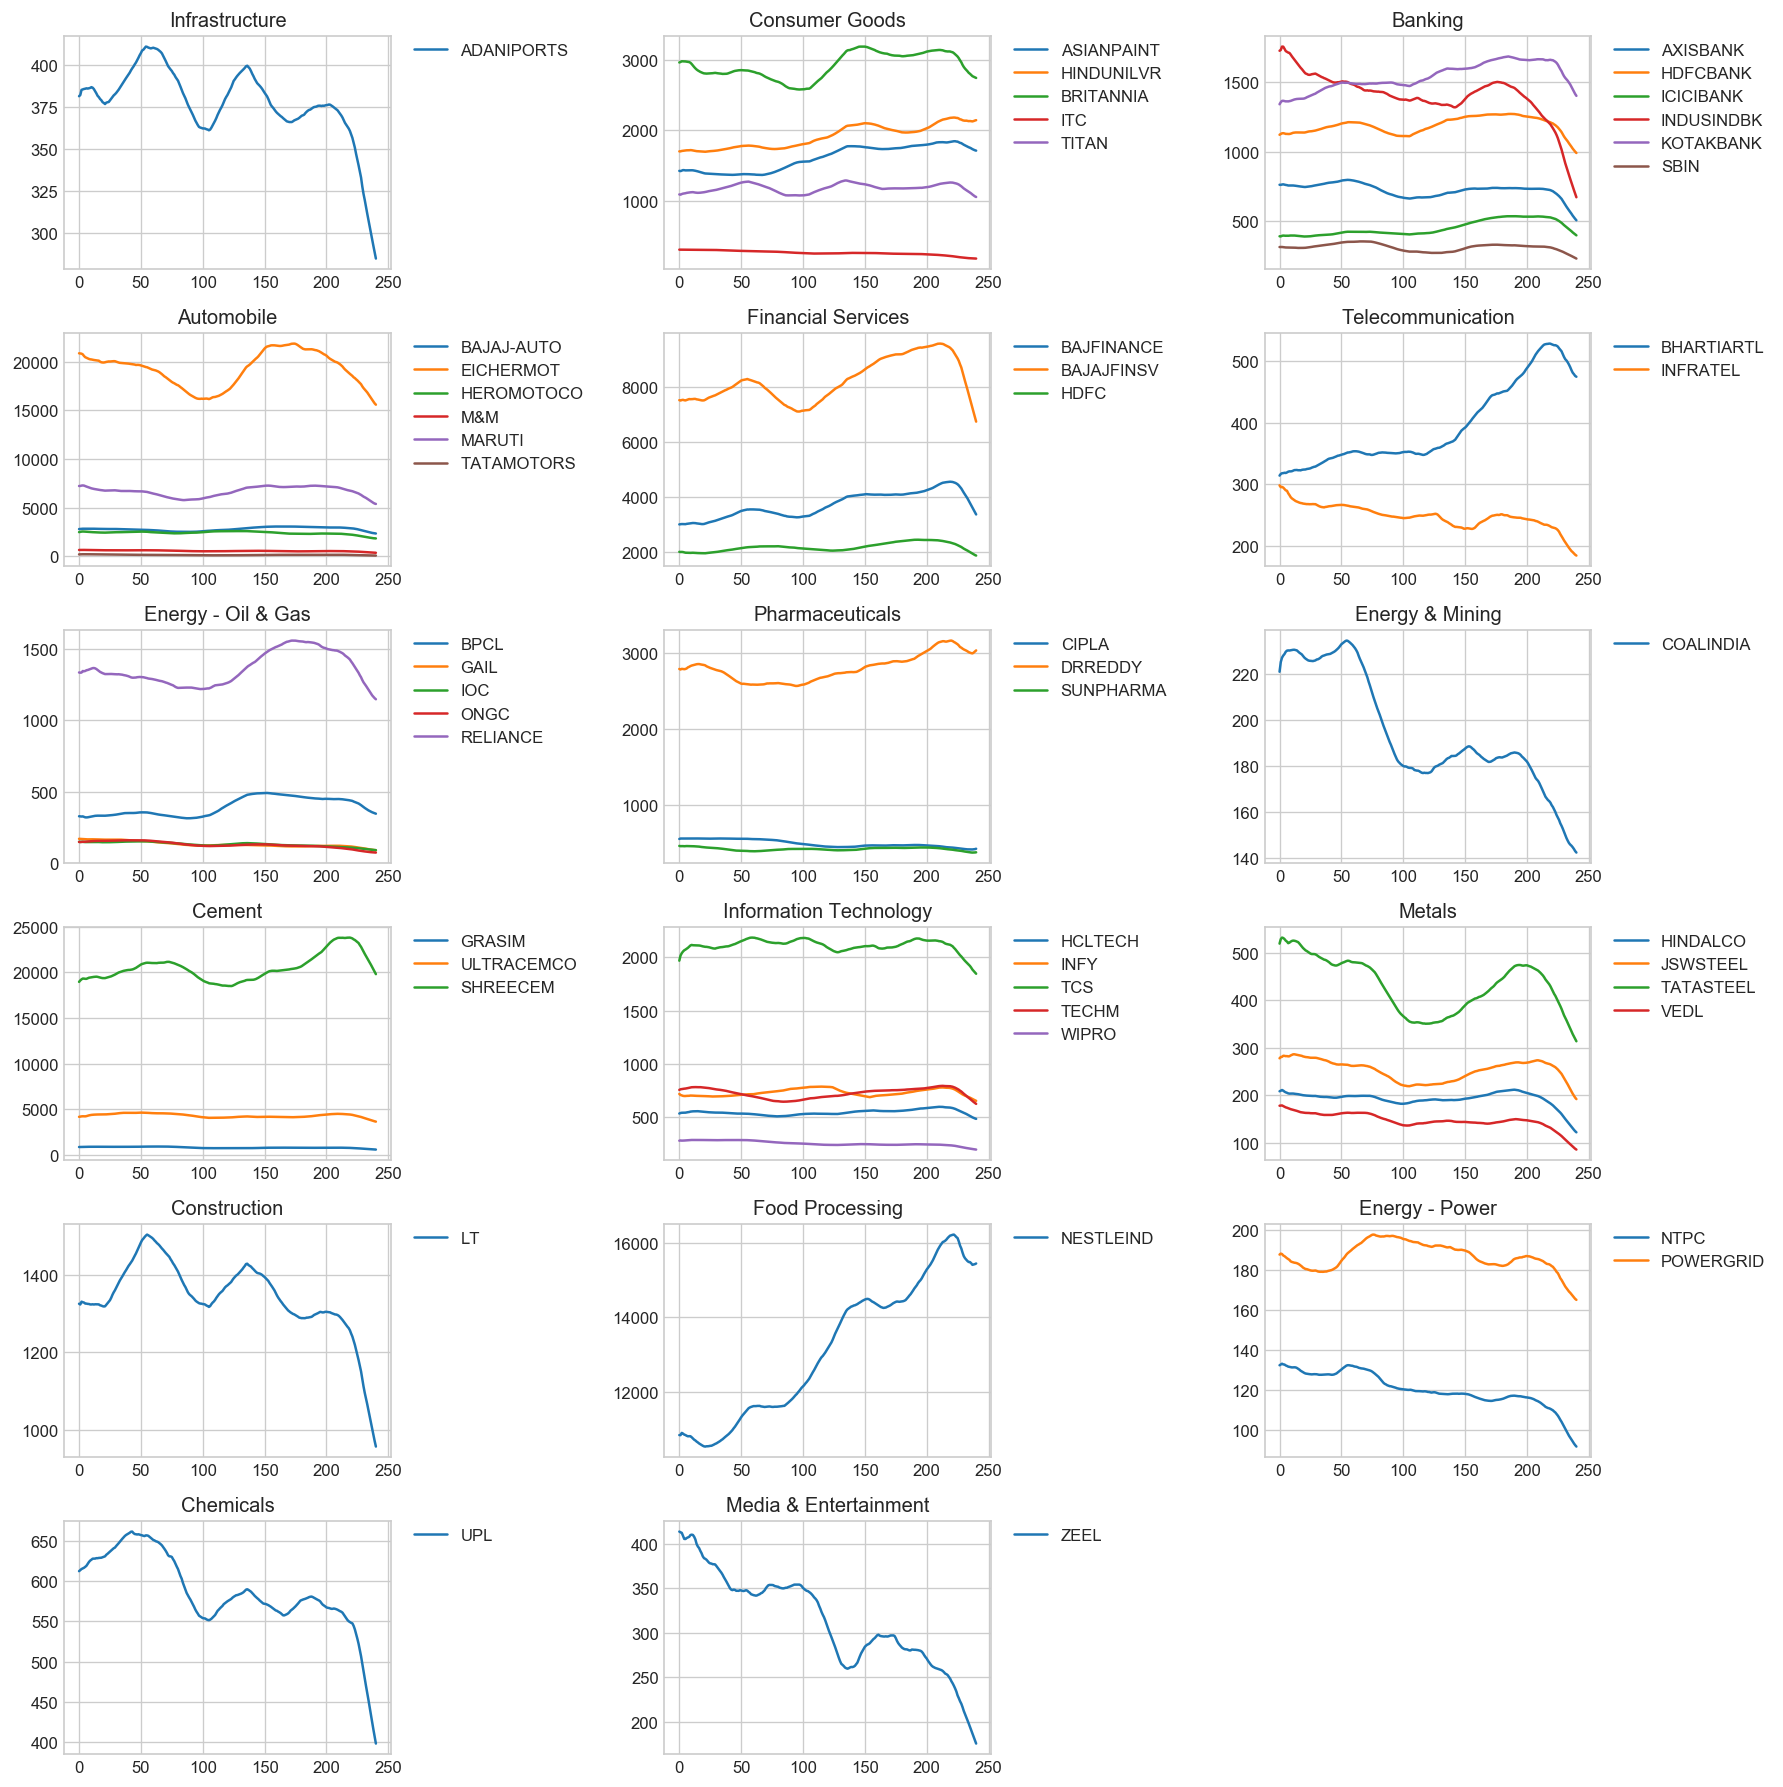

In [164]:
k=1
fig=plt.figure(dpi=120,figsize=(15,15))
for i in stock["Sector"].unique():
    plt.subplot(nrows,ncols,k)
    plt.plot(stock_sector(i))
    plt.title(i)
    plt.legend(stock_sector(i).columns,
               bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    k+=1
plt.tight_layout()
plt.show()

# Saving the Image

~~~
fig.savefig("NiftyFinal.jpg")
~~~

<img src="NiftyFinal.jpg">

# All Nifty Stock price with GrowthRate

100%|█████████████████████████████| 17/17 [00:01<00:00,  9.39it/s]


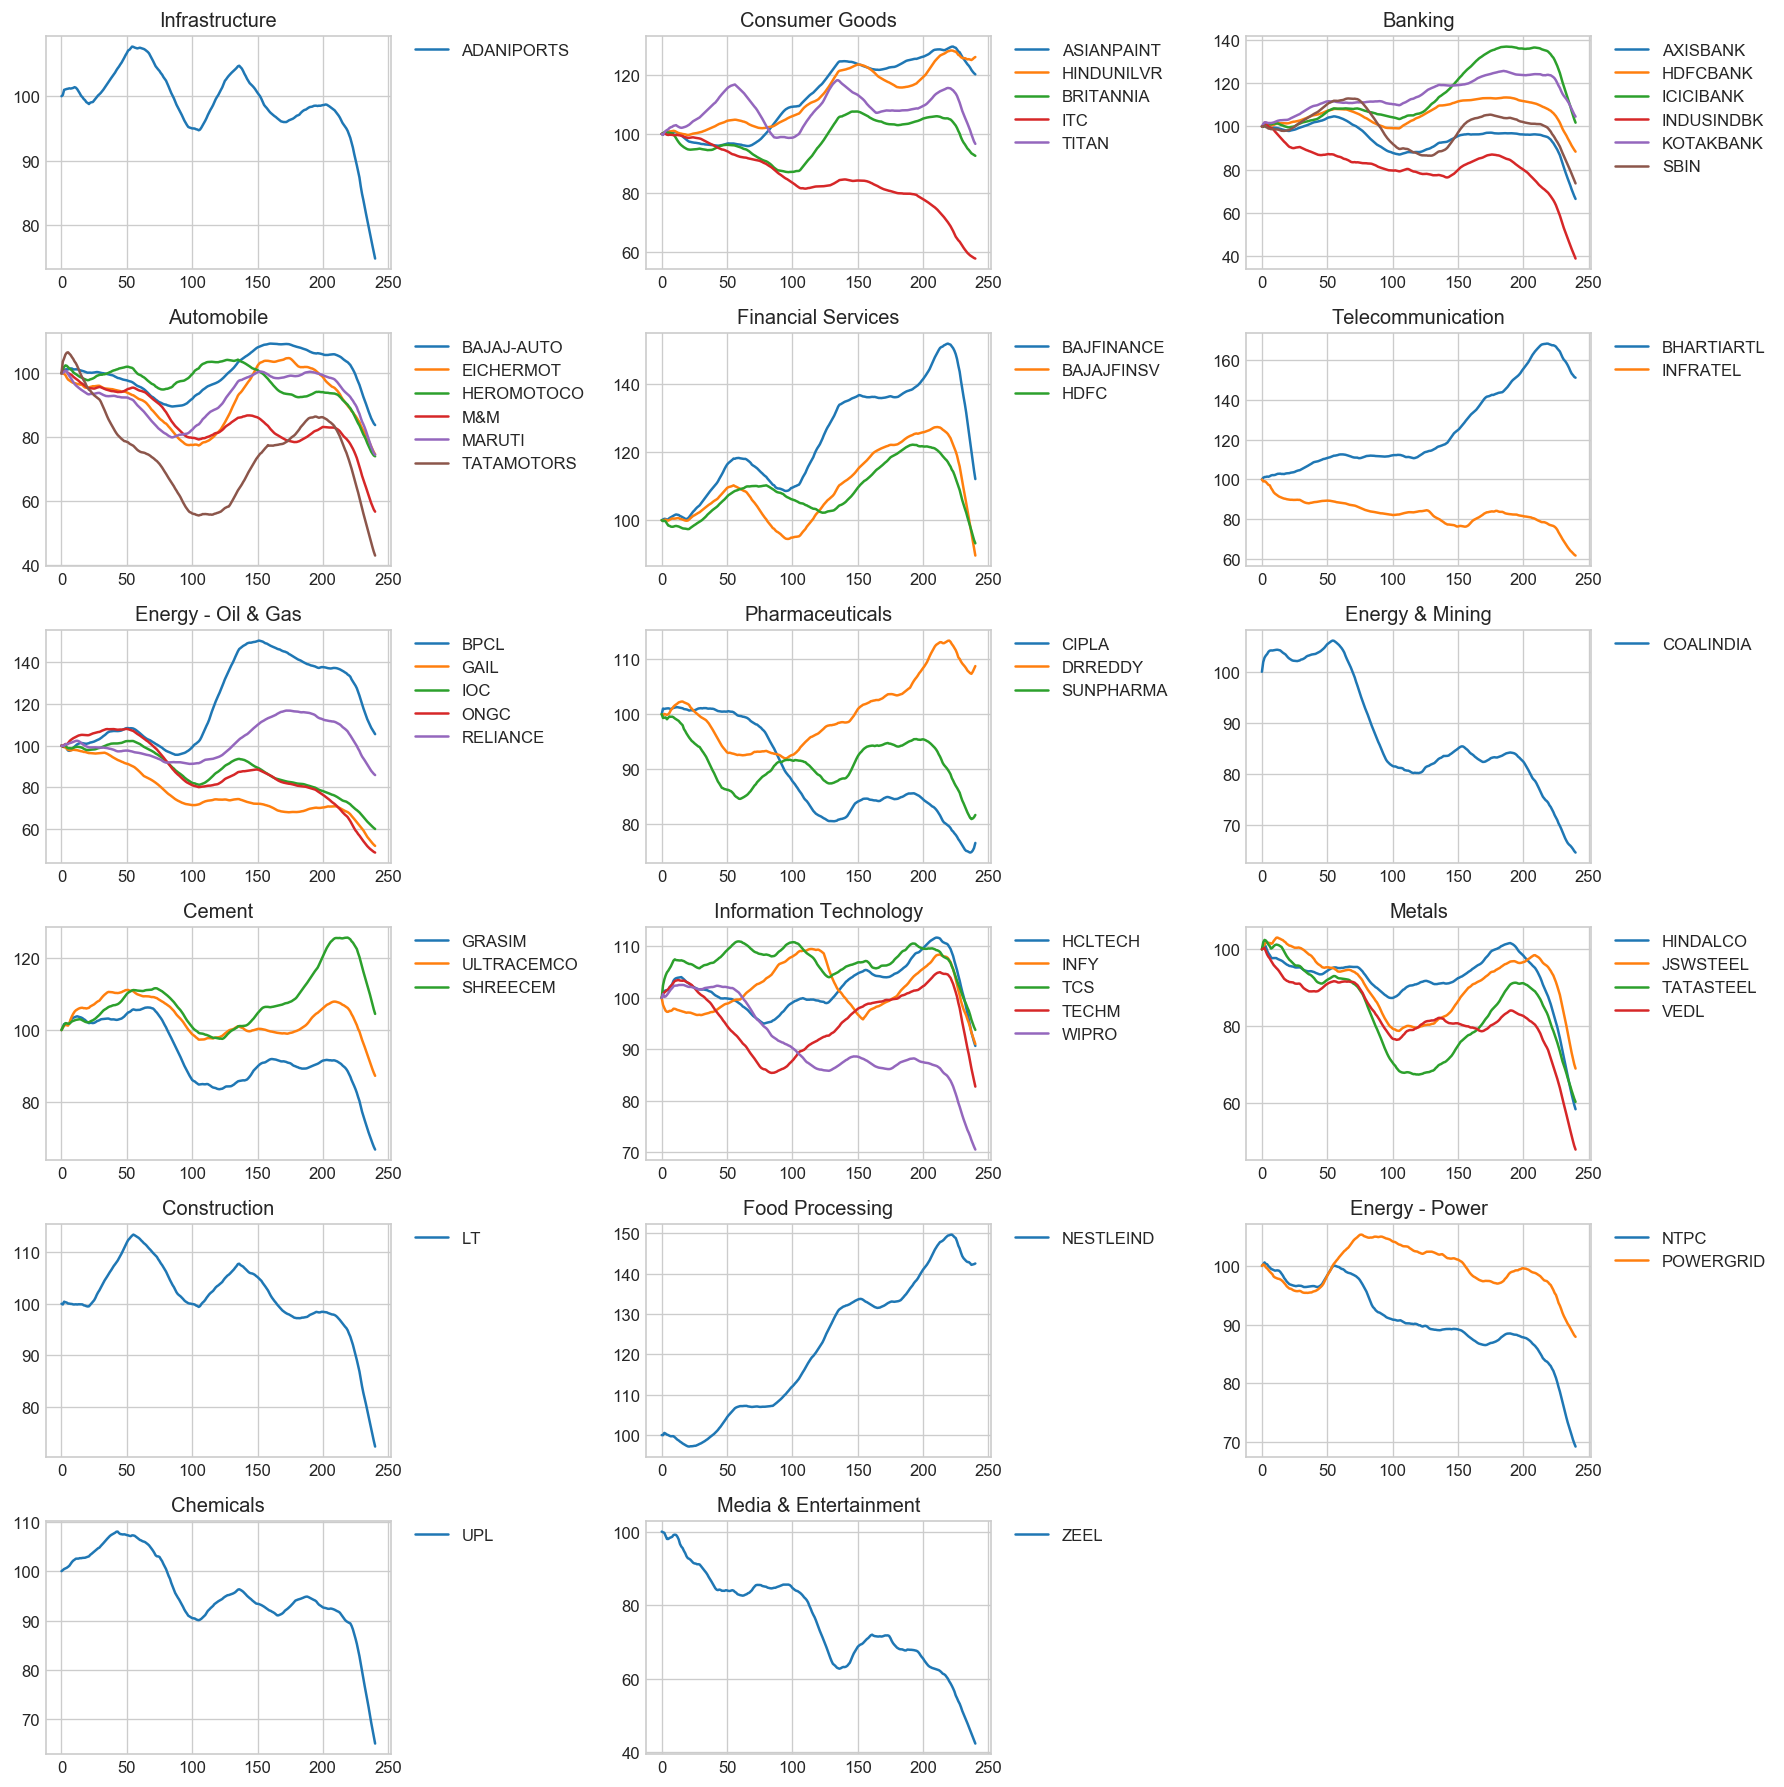

In [167]:
k=1
fig1=plt.figure(dpi=120,figsize=(15,15))
for i in tqdm(stock["Sector"].unique()):
    plt.subplot(nrows,ncols,k)
    plt.plot(stock_sector(i)/stock_sector(i).iloc[0,:]*100)
    plt.title(i)
    plt.legend(stock_sector(i).columns,
               bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    k+=1
plt.tight_layout()
plt.show()

~~~
fig1.savefig("NiftyFinal1.jpg")
~~~